In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree


In [17]:
df = pd.read_csv("card_transdata - with sample ID.csv")
df = df.dropna(axis=1, how='any')
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


NameError: name 'Yhat' is not defined

In [18]:
X = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order',]]
y = df[['fraud']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

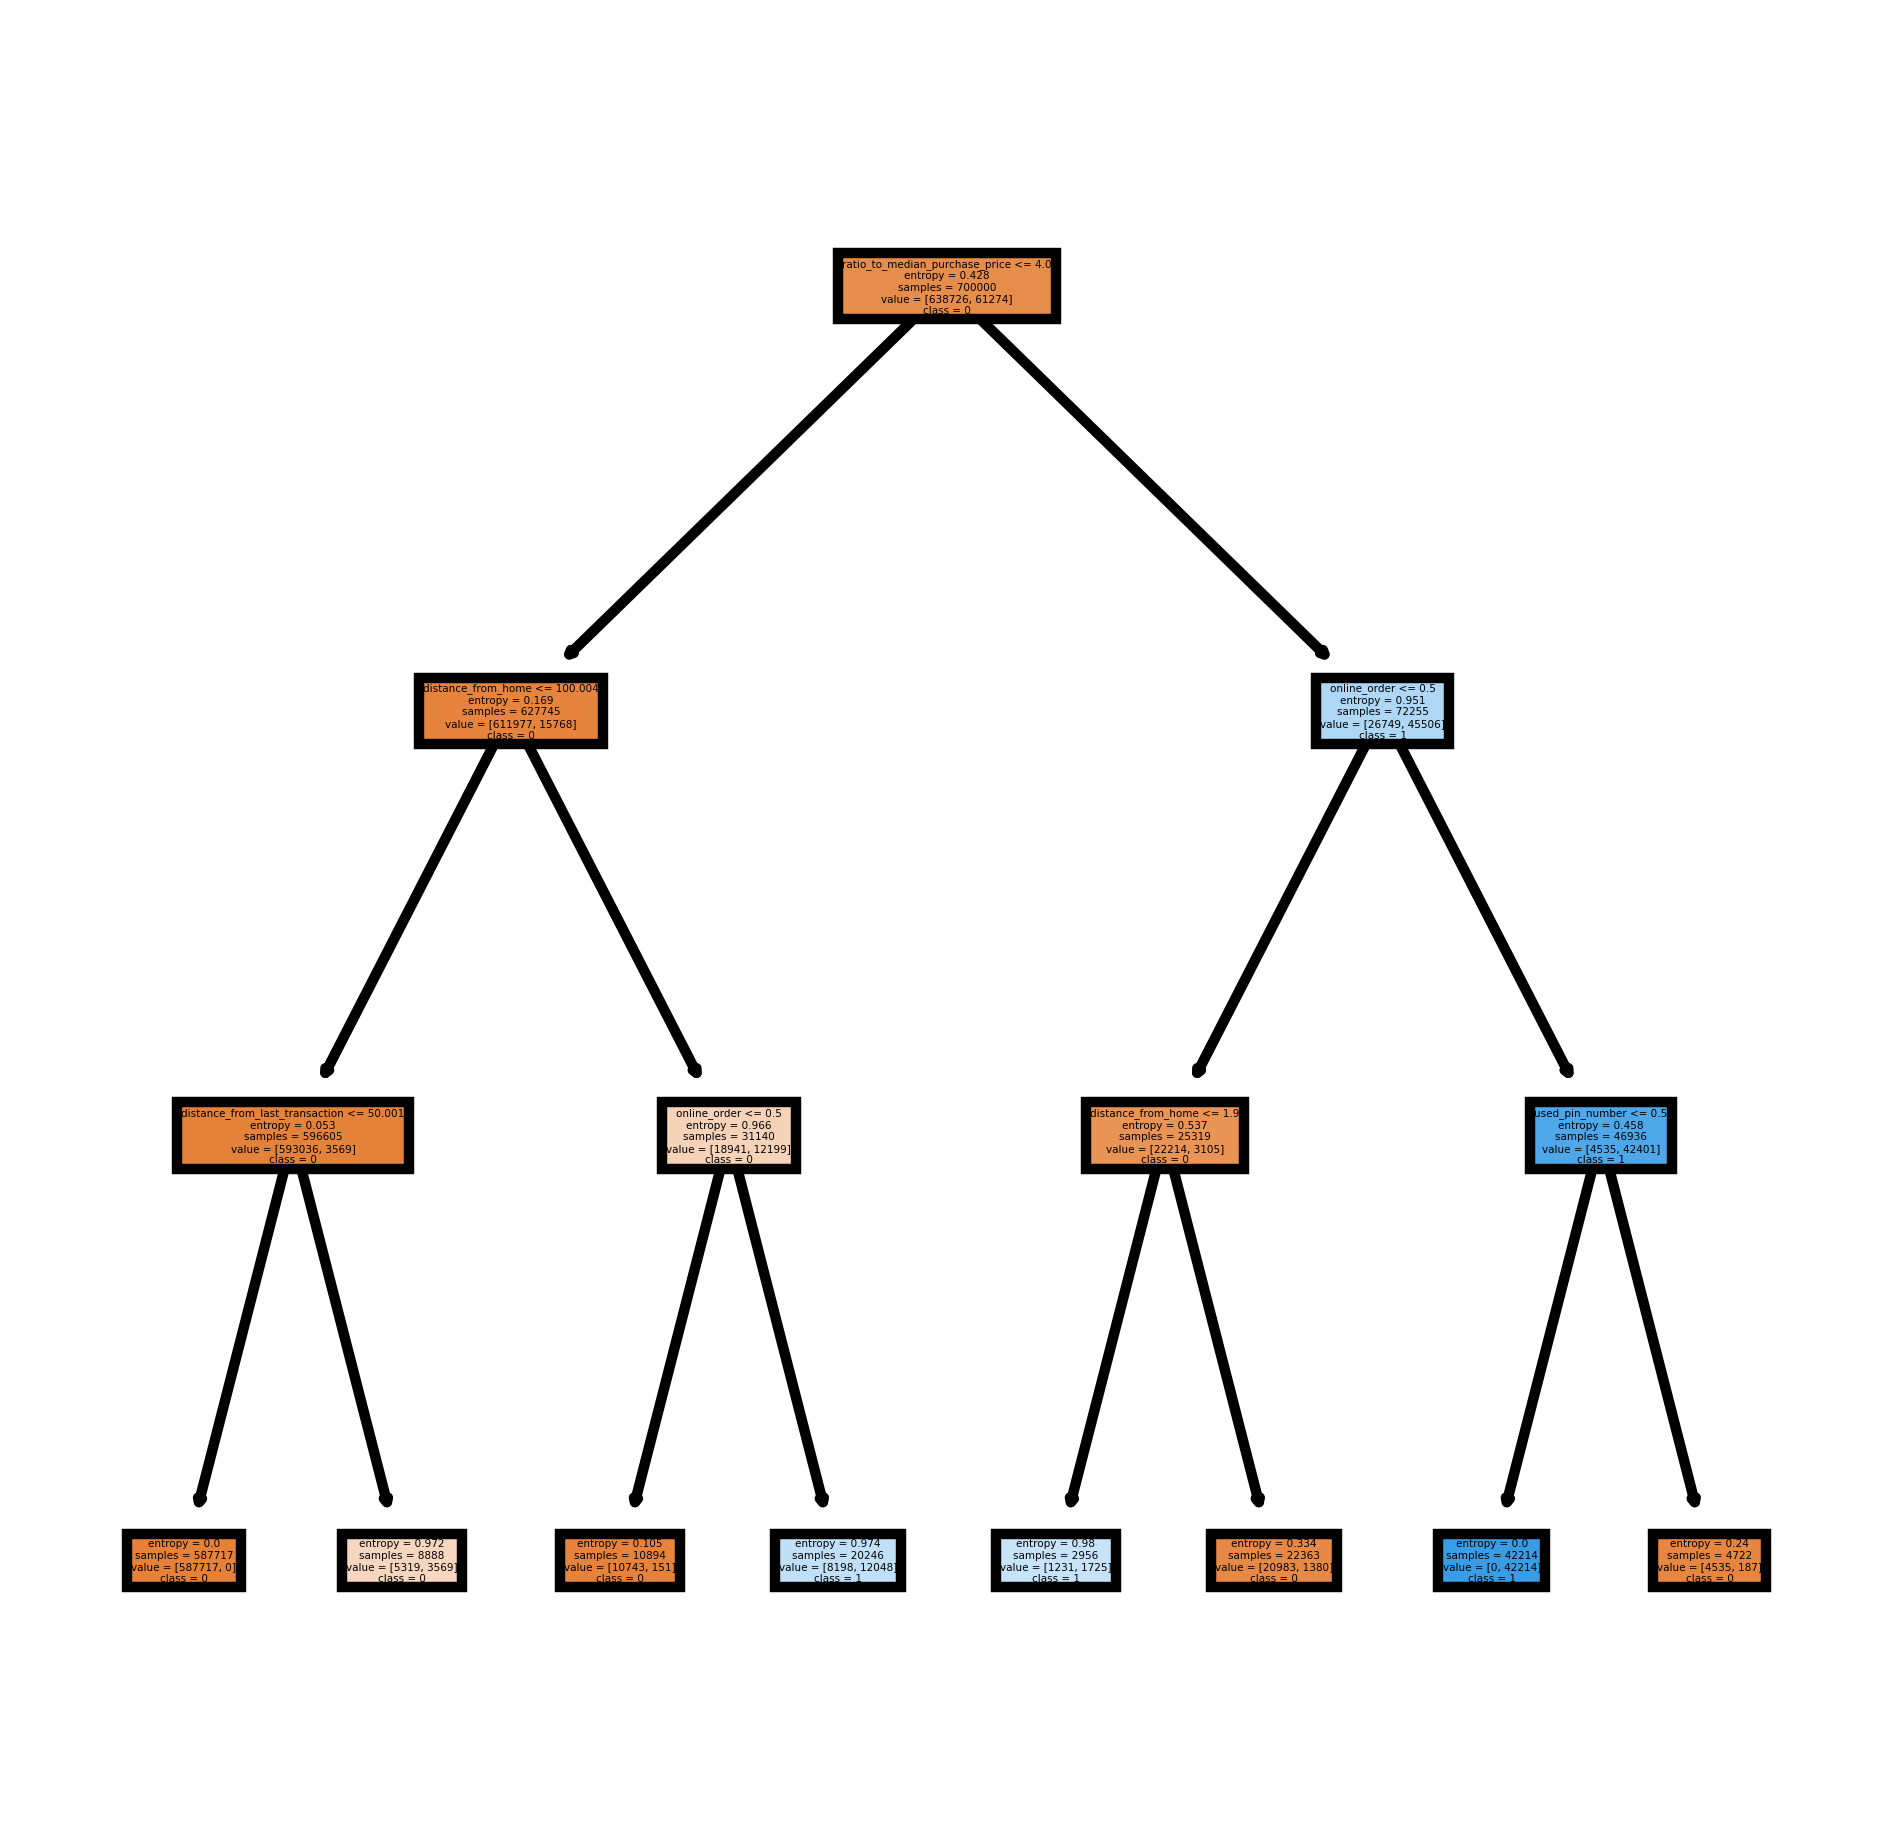

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=750)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [25]:
y_preds = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.97833


In [28]:
from sklearn import metrics
recall = metrics.recall_score(y_test, y_preds)
print('Recall:', recall)

Recall: 0.9130850778828122
